# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = "Starter_Code\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])



In [19]:
# Display the data table for preview
mouse_study_data_complete.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1135,l700,Naftisol,Female,18,27,10,47.013567,1
1573,t994,Placebo,Male,14,30,5,47.891487,0
672,c402,Stelasyn,Female,1,27,10,50.566894,1
450,y449,Ramicane,Male,19,24,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
17,s185,Capomulin,Female,3,17,35,28.328531,1
1451,r107,Propriva,Female,2,28,30,58.406473,1
556,a788,Zoniferol,Male,5,30,25,56.770280,1
261,q610,Ramicane,Female,18,21,30,40.668343,1
546,a699,Propriva,Female,5,28,25,51.846381,0


In [17]:
# Checking the number of mice.
print(mouse_study_data_complete["Mouse ID"].nunique())

249


In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = mouse_study_data_complete[mouse_study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]['Mouse ID'].unique()


Duplicate Mice based on Mouse ID and Timepoint:
['g989']


In [24]:
# Display the array of duplicate "Mouse ID" values
duplicate_mice_id

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID.


# Find the duplicate mice based on both "Mouse ID" and "Timepoint"
duplicate_mice_data = mouse_study_data_complete[mouse_study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Create a separate DataFrame with data for the duplicate mice
duplicate_mice_dataframe = pd.DataFrame(duplicate_mice_data)



In [23]:
# Display the DataFrame with data for the duplicate mice
duplicate_mice_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_data = mouse_study_data_complete.drop_duplicates(subset='Mouse ID', keep='first')



In [48]:
# Display the clean DataFrame
clean_mouse_study_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [49]:
# Checking the number of mice in the clean DataFrame.
print(clean_mouse_study_data["Mouse ID"].nunique())

249


## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by drug regimen and calculate summary statistics
summary_statistics = mouse_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
})




In [54]:
# Display the summary DataFrame
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

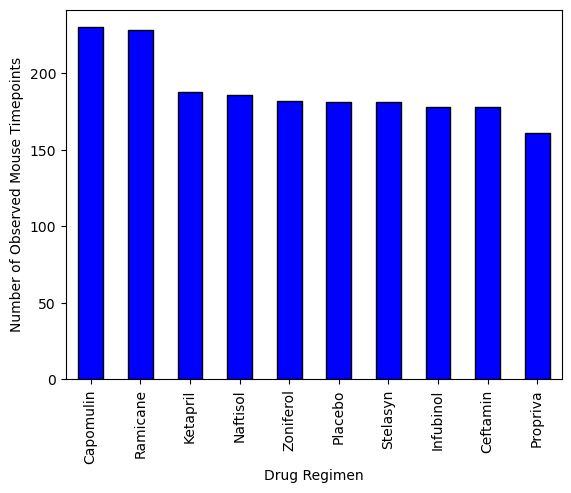

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = mouse_study_data_complete['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', color='blue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Show the plot
plt.show()

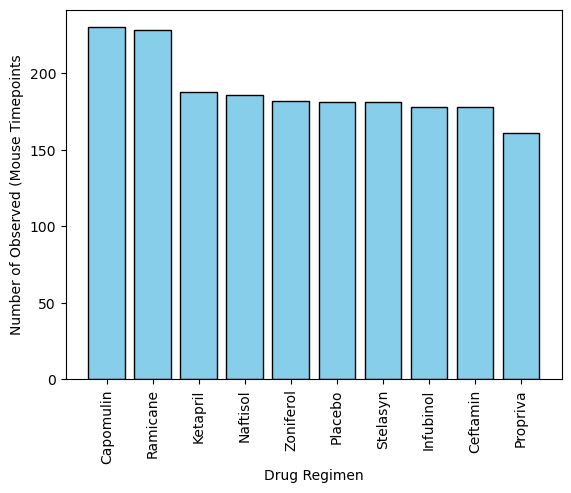

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of rows for each drug regimen
drug_regimen_counts = mouse_study_data_complete['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='skyblue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed (Mouse Timepoints')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


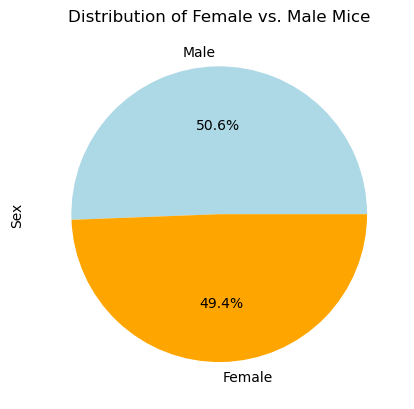

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of occurrences for each gender
gender_distribution = mouse_study_data_complete['Sex'].value_counts()

# Create a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'])

# Set plot title
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()

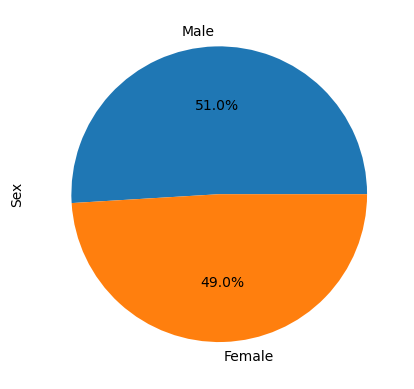

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Define the four treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame for the selected regimens
selected_regimens_data = mouse_study_data_complete[mouse_study_data_complete['Drug Regimen'].isin(selected_regimens)]

# Find the last (greatest) timepoint for each mouse
last_timepoint_per_mouse = selected_regimens_data.groupby('Mouse ID')['Timepoint'].idxmax()

# Create a DataFrame with the last timepoint for each mouse
final_tumor_volume_df = selected_regimens_data.loc[last_timepoint_per_mouse]



In [71]:
final_tumor_volume_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [75]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

# Create an empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Define the four treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Loop through each regimen to calculate IQR and identify potential outliers
for regimen in selected_regimens:
    # Filter the data for the specific regimen
    regimen_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    tumor_vol_data.append(regimen_data)
    
    # Calculate the quartiles and IQR
    quartiles = regimen_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify potential outliers
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    # Print the results
    print(f"Potential outliers for {regimen}: {outliers.values}")

# Box plot to visualize potential outliers


Potential outliers for Capomulin: []
Potential outliers for Ramicane: []
Potential outliers for Infubinol: [36.3213458]
Potential outliers for Ceftamin: []


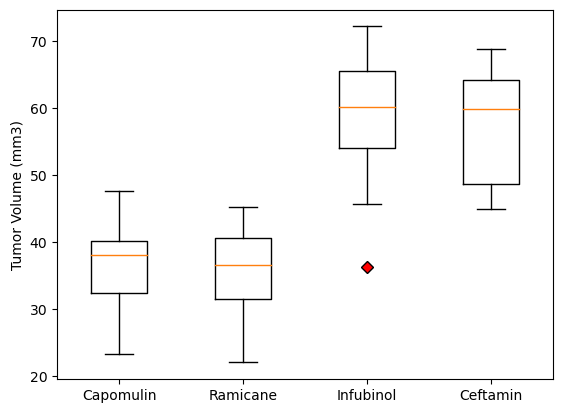

In [76]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=selected_regimens, flierprops=dict(markerfacecolor='red', marker='D'))
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

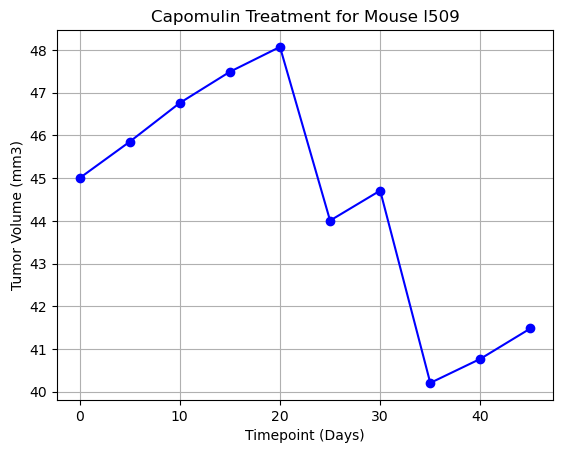

In [77]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = 'l509'

# Filter the data for the selected mouse and Capomulin regimen
selected_mouse_data = mouse_study_data_complete[(mouse_study_data_complete['Mouse ID'] == selected_mouse_id) & 
                                                 (mouse_study_data_complete['Drug Regimen'] == 'Capomulin')]

# Generate a line plot of tumor volume vs. time point
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')

# Set plot labels and title
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment for Mouse {selected_mouse_id}')

# Show the plot
plt.grid(True)
plt.show()

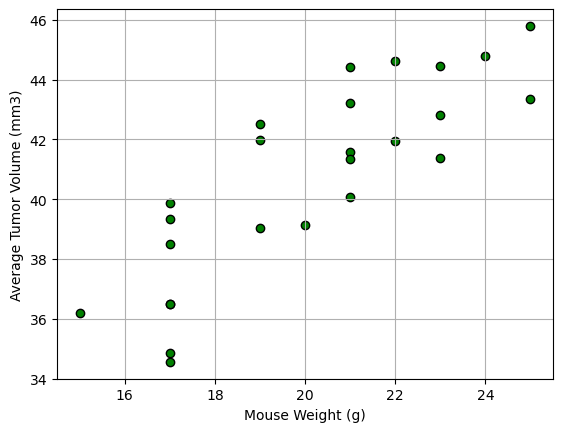

In [78]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_data_complete[mouse_study_data_complete['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse metadata to get the weight
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')

# Generate a scatter plot of mouse weight vs. average observed tumor volume
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='green', edgecolors='black')

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


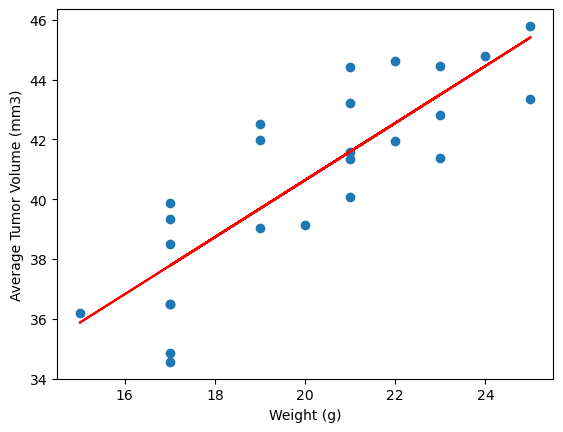

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


Correlation Coefficient: 0.841936342469472


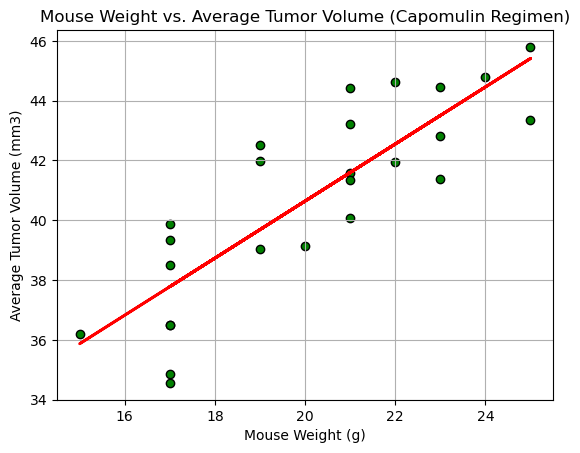

In [79]:
capomulin_data = mouse_study_data_complete[mouse_study_data_complete['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse metadata to get the weight
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')

# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create a linear regression model
regression_line = slope * merged_data['Weight (g)'] + intercept

# Generate a scatter plot of mouse weight vs. average observed tumor volume
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='green', edgecolors='black')

# Plot the linear regression line
plt.plot(merged_data['Weight (g)'], regression_line, color='red', linewidth=2)

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

# Show the plot
plt.grid(True)
plt.show()